In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ! pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 1.2 MB/s  0:00:32m0:00:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.4 MB/s  0:00:03m0:00:0100:02
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]


In [3]:
def apply_filter(image, kernel):
    """Applies a filter (kernel) to an image using convolution."""
    # Get dimensions
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Determine padding size
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Output image
    filtered_image = np.zeros_like(image)

    # Perform convolution
    #-------Todo-----------#
    
    # loop over each pixel in the image 
    for i in range(image_h):
        for j in range(image_w):
            # align the kernel by making the pixel the center 
            interesection_region = padded_image[i:i+kernel_h, j:j+kernel_w]
                # and multiply the overlapping values and sum them 
            filtered_value = np.sum(interesection_region * kernel)
            filtered_image[i,j] = filtered_value
            

    # Clip values to valid range [0, 255]
    filtered_image = np.clip(filtered_image, 0, 255)

    return filtered_image


### Smoothing Filter

In [12]:
# Load the image and convert to grayscale
image = cv2.imread('./gates_2.jpg', 0)
image_nahom = cv2.imread('./nahom.jpg', 0)
image_array = np.array(image)
image_array_nahom = np.array(image_nahom)

In [13]:
def display_images(blurred_image, title= "Blurred Image"):
    plt.imshow(blurred_image, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

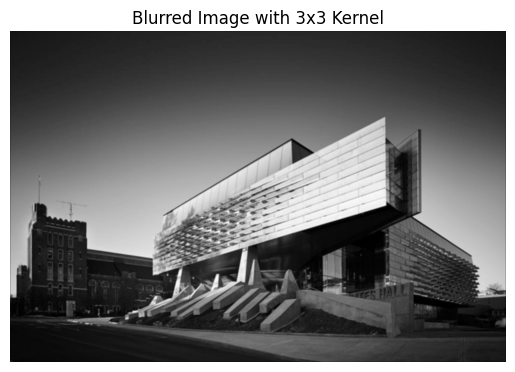

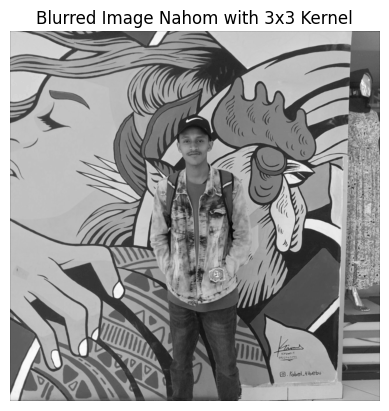

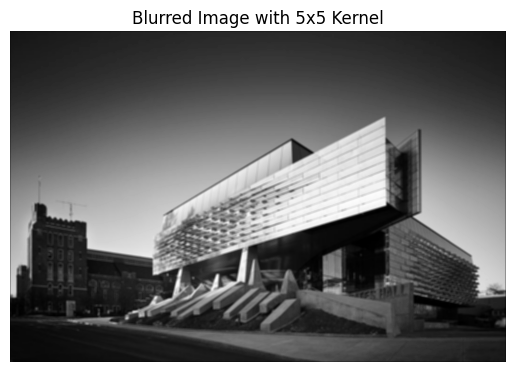

In [14]:
# Define a blur kernel
blur_kernel = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]]) / 9.0

# Apply the blur filter
blurred_image = apply_filter(image_array, blur_kernel)
display_images(blurred_image, "Blurred Image with 3x3 Kernel")

blurred_image_nahom = apply_filter(image_array_nahom, blur_kernel)
display_images(blurred_image_nahom, "Blurred Image Nahom with 3x3 Kernel")


# Define a blur kernel
blur_kernel = np.array([[1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1]
                        ])/25.0

# Apply the blur filter
blurred_image = apply_filter(image_array, blur_kernel)
display_images(blurred_image, "Blurred Image with 5x5 Kernel")

### Sharpening Filter

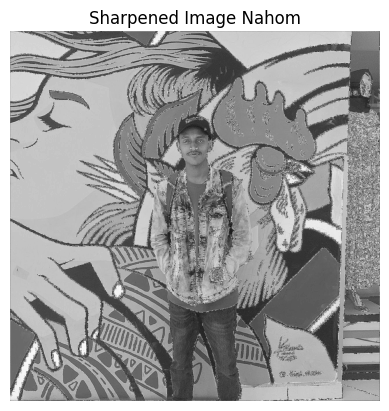

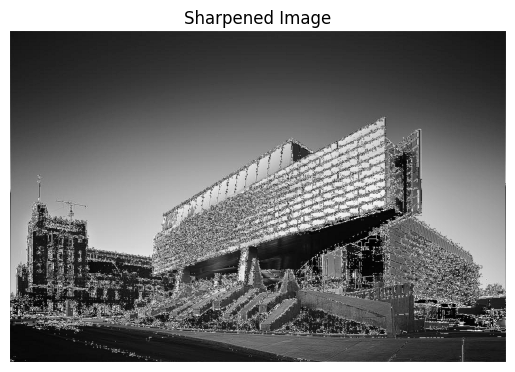

In [15]:
# Define a sharpening kernel

#-------Todo-----------#
sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

# Apply the sharpening filter
sharpened_image = apply_filter(image_array, sharpen_kernel)
sharpend_image_nahom = apply_filter(image_array_nahom, sharpen_kernel)
display_images(sharpend_image_nahom, "Sharpened Image Nahom")

# Display the result
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.title("Sharpened Image")
plt.show()

### Edge Detection Filter

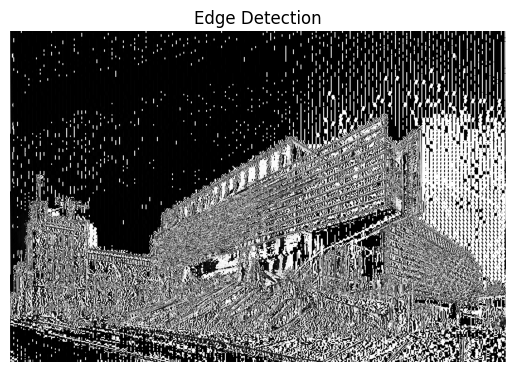

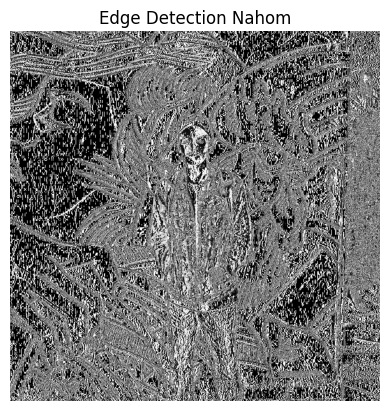

In [19]:
#-------Todo-----------#
# edge_kernel = np.array([
#     [0,  1, 0],
#     [1, -4, 1],
#     [0,  1, 0]
# ])

edge_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])


# Apply the edge detection filter
edge_image = apply_filter(image_array, edge_kernel)

# Display the result
plt.imshow(edge_image, cmap='gray')
plt.axis('off')
plt.title("Edge Detection")
plt.show()

edge_image_nahom = apply_filter(image_array_nahom, edge_kernel)
display_images(edge_image_nahom, "Edge Detection Nahom")    